# **Probando los modelos:**

A continuación se prueban los modelos expuestos anteriormente para demostrar la otra bondad del modelo *one-shot learning*:

In [122]:
import os
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [123]:
os.getcwd()

'/content/drive/Shareddrives/2023-II/2023-II. Inteligencia Artificial (IA)/Proyecto IA/Presentación (Prueba)'

In [124]:
os.chdir('/content/drive/Shareddrives/2023-II/2023-II. Inteligencia Artificial (IA)/Proyecto IA/Presentación (Prueba)')

In [125]:
os.listdir()

['Prueba.ipynb', 'Modelos', 'Firmas']

### **Cargando el modelo:**

In [126]:
import matplotlib.pyplot as plt
import itertools
import random
from sklearn.utils import shuffle
from keras import layers
from keras import models
from keras import backend as K

In [127]:
oneshot = models.load_model('/content/drive/Shareddrives/2023-II/2023-II. Inteligencia Artificial (IA)/Proyecto IA/Presentación (Prueba)/Modelos/oneshot.h5')

## **Comprobando con imágenes de la base de datos `test`:**

Recuerde que para el entrenamiento y prueba de este modelo no se usaron datos de esta carpeta:

In [128]:
import cv2
from tqdm import tqdm
from google.colab.patches import cv2_imshow
os.chdir('/content/drive/Shareddrives/2023-II/2023-II. Inteligencia Artificial (IA)/Proyecto IA/signature_data/test_data')

In [129]:
os.listdir()[0:4]

['069', '069_forg', '068', '068_forg']

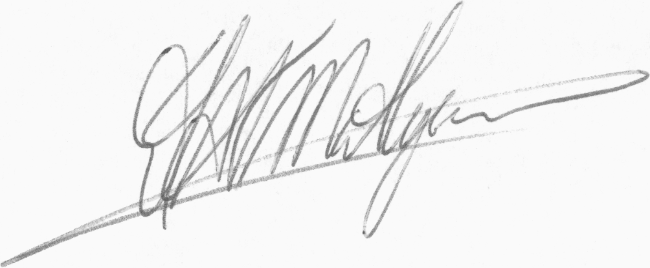

In [130]:
pathGenuina = '069/'+ os.listdir('069/')[0]
genuina = cv2.imread(pathGenuina)
cv2_imshow(genuina)

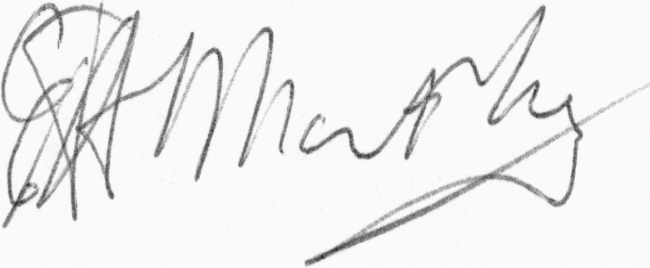

In [131]:
pathFalsa = '069_forg/'+ os.listdir('069_forg/')[2]
falsa = cv2.imread(pathFalsa)
cv2_imshow(falsa)

In [132]:
def check_forgery(path_img_1, path_img_2, verbose = 0):
    img1 = cv2.imread(path_img_1, cv2.IMREAD_GRAYSCALE)
    img2 = cv2.imread(path_img_2, cv2.IMREAD_GRAYSCALE)
    img1 = cv2.resize(img1, (650, 268))
    img2 = cv2.resize(img2, (650, 268))
    img1 = img1.reshape((1, 268, 650, 1))
    img2 = img2.reshape((1, 268, 650, 1))
    img1 = img1.astype('float32') / 255
    img2 = img2.astype('float32') / 255

    if oneshot.predict((img1, img2), verbose = verbose)[0][0] >=0.5:
        return 'genuina'
    else:
        return 'falsa'

In [133]:
for i in os.listdir('069_forg/'):
  print(f'La firma {i} es ', end = '')
  print(check_forgery(pathGenuina,'069_forg/'+ i, verbose = 0))

La firma 01_0106069.PNG es falsa
La firma 01_0108069.PNG es falsa
La firma 01_0111069.PNG es falsa
La firma 02_0106069.PNG es falsa
La firma 02_0108069.PNG es falsa
La firma 02_0111069.PNG es falsa
La firma 03_0106069.PNG es falsa
La firma 03_0108069.PNG es falsa
La firma 03_0111069.PNG es falsa
La firma 04_0106069.PNG es falsa
La firma 04_0108069.PNG es falsa
La firma 04_0111069.PNG es falsa


In [134]:
for i in os.listdir('069/'):
  print(f'La firma {i} es ', end = '')
  print(check_forgery(pathGenuina,'069/'+ i, verbose = 0))

La firma 01_069.png es genuina
La firma 02_069.png es genuina
La firma 03_069.png es genuina
La firma 04_069.png es genuina
La firma 05_069.png es genuina
La firma 06_069.png es genuina
La firma 07_069.png es genuina
La firma 08_069.png es genuina
La firma 09_069.png es genuina
La firma 10_069.png es genuina
La firma 11_069.png es genuina
La firma 12_069.png es genuina


## **Ahora el ejercicio en clase:**

Con el permiso de nuestro compañero Gabriel, nos gustaría pedir que alguien del público intente falsificar su firma:

In [135]:
os.chdir('/content/drive/Shareddrives/2023-II/2023-II. Inteligencia Artificial (IA)/Proyecto IA/Presentación (Prueba)')
os.listdir()

['Prueba.ipynb', 'Modelos', 'Firmas']

In [175]:
os.listdir('Firmas')

['genuina2.png', 'genuina1.png', 'falsa1.png']

### **Firmas genuinas:**

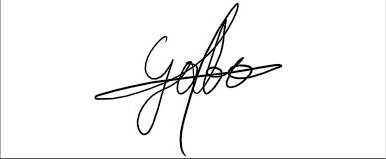

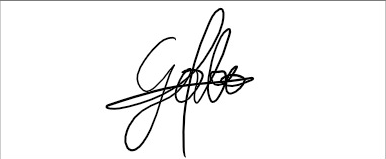

In [176]:
genuinas = list(filter(lambda x: 'genuina' in x, os.listdir('Firmas')))
for i in genuinas:
  FirmaGenuina = cv2.imread('Firmas/'+i)
  cv2_imshow(FirmaGenuina)



======================================== LA FIRMA GENUINA ========================================




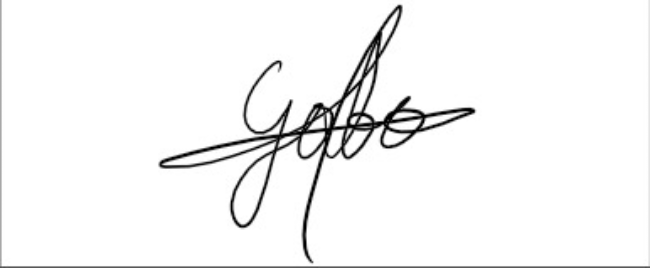



======================================== FIRMA FALSA: falsa1.png ========================================




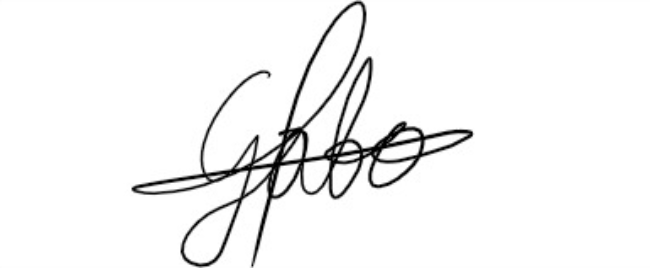

La firma es falsa


In [178]:
falsas = list(filter(lambda x: 'falsa' in x, os.listdir('Firmas')))
PathFirmaGenuina = 'Firmas/' + genuinas[0]
Genuina = cv2.imread(PathFirmaGenuina, cv2.IMREAD_GRAYSCALE)
print('\n\n' + 40*'='+' LA FIRMA GENUINA '+ 40*'=' + '\n\n')
Genuina = cv2.resize(Genuina, (650, 268))
cv2_imshow(Genuina)
Genuina = Genuina.astype('float32') / 255
Genuina = Genuina.reshape((1, 268, 650, 1))
for i in falsas:
  print(f'\n\n' + 40*'='+f' FIRMA FALSA: {i} '+ 40*'=' + '\n\n')
  Falsa = cv2.imread('Firmas/'+i, cv2.IMREAD_GRAYSCALE)
  Falsa = cv2.resize(Falsa, (650, 268))
  cv2_imshow(Falsa)
  Falsa = Falsa.astype('float32') / 255
  Falsa = Falsa.reshape((1, 268, 650, 1))
  if oneshot.predict((Genuina,Falsa), verbose = 0)[0][0] <= 0.5:
    print('La firma es falsa')
  else:
    print('La firma es genuina')

In [156]:
Genuina.shape

(1, 268, 650, 1)

In [157]:
Falsa.shape

(268, 650, 3)